# Sentiment Analysis

Sentiment Analysis atau analisis sentimen adalah teknik dalam pemrosesan bahasa alami (Natural Language Processing - NLP) yang digunakan untuk menentukan apakah suatu teks memiliki sentimen positif, negatif, atau netral.

Teknologi ini sering digunakan untuk menganalisis opini dari berbagai sumber seperti:
*   Ulasan Film
*   Media Sosial (Twitter, Instagram, Facebook)
*   Ulasan Produk (Amazon, Tokopedia, Shopee)
*   Survei Pelanggan






# Pengambilan keputusan dengan pemrograman tradisional

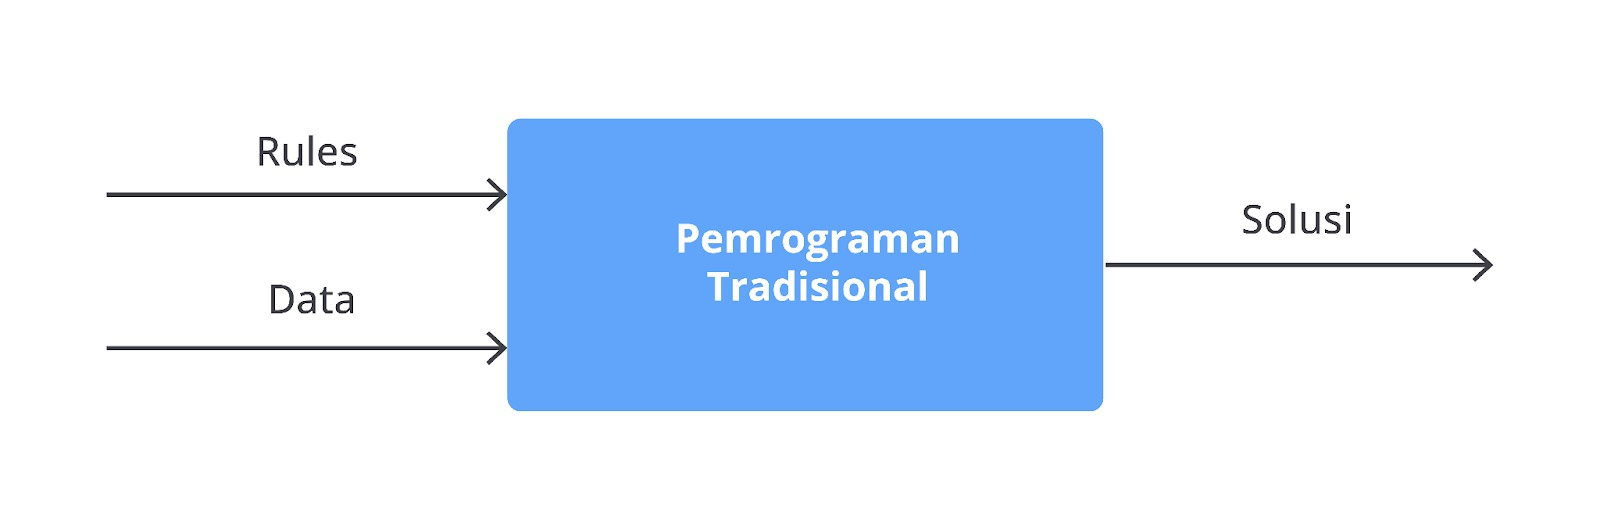

In [ ]:
# Daftar kata positif dan negatif
positive_words = ["baik", "bagus", "luar biasa", "hebat", "menyenangkan", "suka"]
negative_words = ["buruk", "jelek", "menyedihkan", "benci", "kecewa", "payah"]

def analyze_sentiment(text):
    text = text.lower()
    pos_count = sum(1 for word in positive_words if word in text)
    neg_count = sum(1 for word in negative_words if word in text)

    if pos_count > neg_count:
        return "Positif"
    elif neg_count > pos_count:
        return "Negatif"
    else:
        return "Netral"

# Contoh penggunaan
text = "Saya sangat suka film ini, luar biasa!"
print(analyze_sentiment(text))  # Output: Positif

# Pengambilan keputusan dengan machine learning

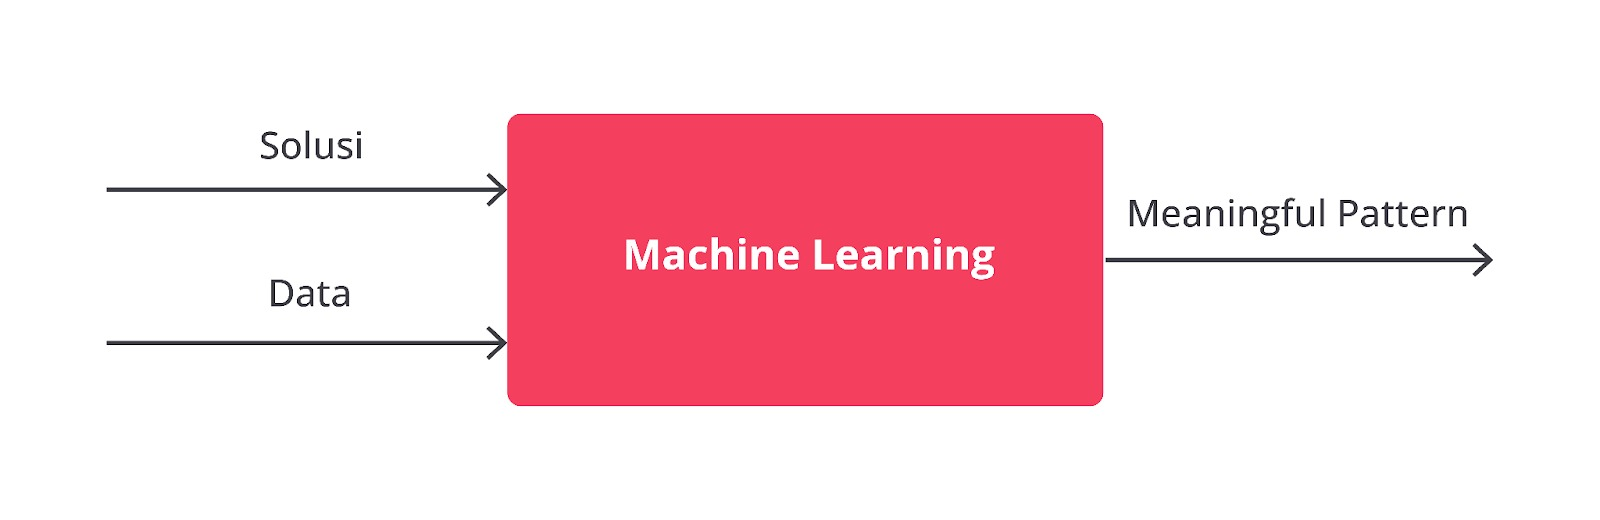

Download library dan modul yang diperlukan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import resample
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import string

# Download necessary NLTK resources
nltk.download('stopwords', quiet=True)
nltk.download('punkt_tab', quiet=True)

Tampilkan dataset

In [ ]:
# Load the dataset
print("Loading the IMDB dataset...")
df = pd.read_csv('IMDB Dataset.csv')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
df.head(100)

Mengecek nilai yang kosong

In [ ]:
# Check for missing values
print("\nMissing values:")
df.isnull().sum()

In [4]:
df['sentiment'] = df['sentiment'].fillna(df['sentiment'].mode()[0])

In [ ]:
# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
df.head(100)

Melihat distribusi sentiment

In [ ]:
# Check the distribution of sentiments
print("\nSentiment distribution:")
df['sentiment'].value_counts()

In [ ]:
# Menghapus satu baris dari kelas "negative"
df = df.drop(df[df['sentiment'] == 'negative'].index[0])

# Cek distribusi setelah dihapus
df['sentiment'].value_counts()


Processing data

In [ ]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove whitespace
    text = text.strip()

    # Tokenization and remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Join tokens back into text
    text = ' '.join(tokens)

    return text

# Apply preprocessing to the reviews
print("\nPreprocessing text data...")
df['cleaned_review'] = df['review'].apply(preprocess_text)

In [ ]:
# Print a sample of original and cleaned text
print("\nSample of original and cleaned text:")
sample_index = 1
print(f"Original: {df['review'].iloc[sample_index][:200]}...")
print(f"Cleaned: {df['cleaned_review'].iloc[sample_index][:200]}...")

In [ ]:
# Create feature vectors using TF-IDF
print("\nCreating TF-IDF features...")
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review']).toarray()

In [19]:
# Map sentiment labels to binary values
y = df['sentiment'].map({'positive': 1, 'negative': 0}).values

In [ ]:
print(y[:5])

In [ ]:
df.head(5)

In [ ]:
# Split the dataset into training and testing sets
print("\nSplitting dataset into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

In [ ]:
# Train a Logistic Regression model
print("\nTraining a Logistic Regression model...")
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Function to predict sentiment of new reviews
def predict_sentiment(review_text, model, vectorizer):
    # Preprocess the review
    cleaned_review = preprocess_text(review_text)

    # Transform the review to TF-IDF features
    review_features = vectorizer.transform([cleaned_review]).toarray()

    # Predict sentiment
    prediction = model.predict(review_features)[0]

    return "Positive" if prediction == 1 else "Negative"


In [ ]:
# Test with a sample review
sample_review = "This movie was absolutely fantastic! The acting was great and the plot was engaging."
prediction = predict_sentiment(sample_review, model, tfidf)
print(f"\nSample review: '{sample_review}'")
print(f"Predicted sentiment: {prediction}")

# Additional example: Try with a negative review
negative_review = "The actor is poor"
prediction = predict_sentiment(negative_review, model, tfidf)
print(f"\nSample review: '{negative_review}'")
print(f"Predicted sentiment: {prediction}")

# Model machine learning multilingual sentiment

In [26]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

model_name = "tabularisai/multilingual-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

def predict_sentiment(texts):
    inputs = tokenizer(texts, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_map = {0: "Very Negative", 1: "Negative", 2: "Neutral", 3: "Positive", 4: "Very Positive"}
    return [sentiment_map[p] for p in torch.argmax(probabilities, dim=-1).tolist()]

In [ ]:
texts = [
    # English
    "I absolutely love the new design of this app!",
    "The customer service was disappointing.",
    "The weather is fine, nothing special.",
    # Malay
    "Saya suka makanan di sini, sangat sedap!",
    "Pengalaman ini sangat mengecewakan.",
    "Hari ini cuacanya biasa sahaja.",
    # Indonesian
    "Saya tidak suka film ini"
]

for text, sentiment in zip(texts, predict_sentiment(texts)):
    print(f"Text: {text}\nSentiment: {sentiment}\n")